In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas

维度变换分为view级和content级。view级的变换不改变数据每个元素的基本关系，比如[3,28,28,3]变换维度为[3,784,3]之后，其元素之间的关系（基本索引关系/存储顺序）没有变，数据本身并没有改变，属于哪一行哪一列的元素还是可以确定，还是可以原模原样的恢复为[3,28,28,3]。但改变content之后,元素之间的联系就可能被打乱了。[b,h,w,c]的数据可以改变维度为[b,w,h,c]，
content英文意思有目录的意思，即索引

#View级维度变换

一个四维tensor的一般含义

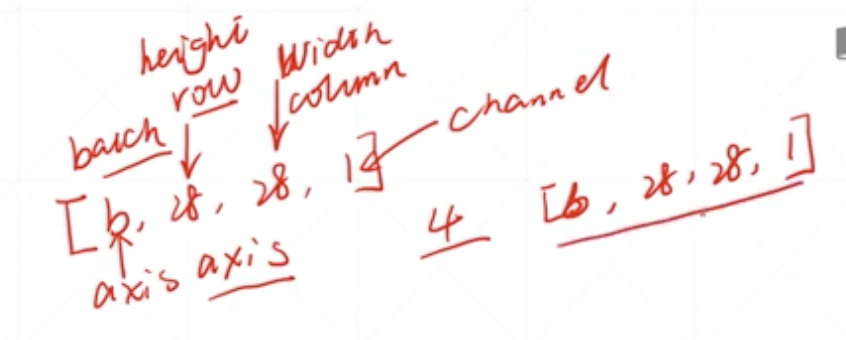

##reshape变换维度

In [0]:
a=tf.ones([6,28,28,3])

-1会自动计算满足要求的维度，但需要满足计算约束条件

In [3]:
b=tf.reshape(a,[6,-1,3])
b.shape

TensorShape([6, 784, 3])

等效于

In [4]:
bb=tf.reshape(a,[6,784,3])
bb.shape

TensorShape([6, 784, 3])

In [5]:
bbb=tf.reshape(bb,[6,28,28,3])
bbb.shape

TensorShape([6, 28, 28, 3])

# content级变换

#矩阵转置

In [7]:
c=tf.random.normal([4,3,2,1])
c.shape

TensorShape([4, 3, 2, 1])

In [8]:
cc=tf.transpose(c)
cc.shape

TensorShape([1, 2, 3, 4])

可以按照给定的顺序进行转置

In [10]:
ccc=tf.transpose(c,perm=[0,3,1,2])#perm参数表示新的tensor的第几个维度放置原来tensor的哪一个维度的数据
ccc.shape

TensorShape([4, 1, 3, 2])

# 维度expand_dims展开（增加）和squeeze挤压（减少）

##维度增加

In [11]:
#四个班级，每个班级35名学生，每个学生8门成绩
d=tf.random.normal([4,35,8])
d.shape

TensorShape([4, 35, 8])

现在在开头增加一个维度，代表学校

In [12]:
dd=tf.expand_dims(d,axis=0)#axis参数表示在哪一个维度的位置增加维度，可以为负（从后往前数）
dd.shape

TensorShape([1, 4, 35, 8])

In [14]:
ddd=tf.expand_dims(d,axis=2)#axis参数表示新增加维度的位置
ddd.shape

TensorShape([4, 35, 1, 8])

##维度（挤压）减少

In [17]:
e=tf.random.normal([1,4,35,8])
e.shape

TensorShape([1, 4, 35, 8])

只能去掉shape中等于1的维度。不能挤压的非要挤当然会坏掉。数据维度能减少的就减少，不能减少的得要减少不就坏了吗

In [18]:
ee=tf.squeeze(e,axis=0)
ee.shape

TensorShape([4, 35, 8])